## 使用 CNN 做人臉識別

### 撰寫網路爬蟲取得圖片資料

In [2]:
import requests
res = requests.get('https://www.chinatimes.com/realtimenews/20190115005089-260404')
res

<Response [200]>

In [4]:
#res.text

In [5]:
url = 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2018/11/25/1/5581159.jpg&x=0&y=0&sw=0&sh=0&sl=W&fw=1050&exp=3600'
res = requests.get(url)
res

<Response [200]>

In [6]:
with open('chiling.jpg', 'wb') as f:
    f.write(res.content)

In [9]:
import requests
from bs4 import BeautifulSoup
res  = requests.get('https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q=%E6%9E%97%E5%BF%97%E7%8E%B2&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start=100&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
soup = BeautifulSoup(res.text, 'lxml')
#soup.select('img')

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [12]:
for rec in soup.select('img'):
    print(rec.get('src'))

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWX7JEFgJOk75lOUGoWr9oz2rh2M6BuHQza7OovSzXrLgSzxGa
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQS47h49XG_9GSxj2IHd77hkZj8v5UbrsLYHk-fS-AvhvO5cef-
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROIEbru-fmUtv6vSrVjisnKAMwFgOFFH2Fw8mtesDUmOPBVHAUqg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRC4LcQpj42AiY1Yx9HRTjPzTKeeX8zhqpf8_QJGE5_bG9-fkT
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMyID85fMSI8twZk3cqpcXUDrXHBUNEw_lvLanQiimJzGI7Xkc
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYA6ItyGNwPhn0uBPQjQ1jOUswuoCAj3DERWA1PHdvvLjlKQy-
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFMPMfrtbyVdrIgSgc93VU20cpyAS1n11MDjgJUbOSoYFQDHUXtw
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJXeewCJPWh-54SOFr_tzSnDIY43Otfe0vwUem90YYjLVe92Tf
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd

In [13]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY'
res = requests.get(url)
with open('1.jpg', 'wb') as f:
    f.write(res.content)

In [14]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPbJ_ik29N84a9-Ha_UKReNSSIboFuPujREebJ4e7f668fXjCY'
res = requests.get(url)
fname = url.split('tbn:')[1]
with open('{}.jpg'.format(fname), 'wb') as f:
    f.write(res.content)

In [22]:
import requests
from bs4 import BeautifulSoup
url  = 'https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q={}&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
idolname = '金城武'
startpos = 0
res  = requests.get(url.format(idolname, startpos))
soup = BeautifulSoup(res.text, 'lxml')
for rec in soup.select('img'):
    #print(rec)
    if rec.get('src'):
        imgurl = rec.get('src')
    elif rec.get('data-src'):
        imgurl = rec.get('data-src')
    res   = requests.get(imgurl)
    fname = imgurl.split('tbn:')[1]
    with open('{}.jpg'.format(fname), 'wb') as f:
        f.write(res.content)

In [24]:
import requests
from bs4 import BeautifulSoup
import os

def getIdolPicture(idolname, pages, dest):
    # Create new destination directory
    if not os.path.exists(dest):
        os.mkdir(dest)
    url  = 'https://www.google.com/search?ei=1ZaVXJDSBa6Rr7wP9p-xuA8&yv=3&tbm=isch&q={}&vet=10ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ.1ZaVXJDSBa6Rr7wP9p-xuA8.i&ved=0ahUKEwjQkJTmmJfhAhWuyIsBHfZPDPcQuT0IogEoAQ&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
    # change page
    for i in range(pages):
        startpos = i * 100
        # get page info
        res  = requests.get(url.format(idolname, startpos))
        soup = BeautifulSoup(res.text, 'lxml')
        # get picture
        for rec in soup.select('img'):
            #print(rec)
            if rec.get('src'):
                imgurl = rec.get('src')
            elif rec.get('data-src'):
                imgurl = rec.get('data-src')
            res   = requests.get(imgurl)
            fname = imgurl.split('tbn:')[1]
            with open('{}/{}.jpg'.format(dest,fname), 'wb') as f:
                f.write(res.content)

In [27]:
getIdolPicture('林志玲', 3, 'chiling')

In [28]:
getIdolPicture('周子瑜', 3, 'tzuyu')

In [29]:
getIdolPicture('徐若瑄', 3, 'vivian')

###  使用Opencv 截取人臉
- https://download.lfd.uci.edu/pythonlibs/u2hcgva4/opencv_python-3.4.5-cp36-cp36m-win_amd64.whl
- ! pip install opencv_python-3.4.5-cp36-cp36m-win_amd64.whl

### Haar cascade
- https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

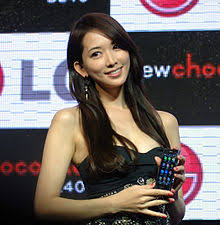

In [53]:
from PIL import Image
im = Image.open('chiling/ANd9GcQ0cZH9Ij5j_hbrIAxSEJiWgsTdBBuJsLwcvkN4ZshFmTj34pX51w.jpg')
im

In [32]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chiling/ANd9GcQ0cZH9Ij5j_hbrIAxSEJiWgsTdBBuJsLwcvkN4ZshFmTj34pX51w.jpg')
img.shape

(225, 220, 3)

In [36]:
?face_cascade.detectMultiScale

In [46]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)

In [47]:
faces

array([[80, 30, 55, 55]], dtype=int32)

In [49]:
x,y,w,h = faces[0]

In [50]:
box = (x, y, x+w, y+h)

In [54]:
crpim = im.crop(box).resize((64,64))

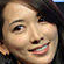

In [56]:
crpim

In [57]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chiling/ANd9GcRCmpPlP3fPUKlA10tc7UEwjF8rdnsXOpb12rJZitnCVx6sbjSt.jpg')
img.shape

(168, 300, 3)

In [58]:
faces = face_cascade.detectMultiScale(img, 1.1, 1)

In [59]:
faces

array([[12, 16, 52, 52],
       [71, 29, 78, 78]], dtype=int32)

In [60]:
len(faces)

2

In [64]:
src  = 'chiling/'
dest = 'chiling_face/'
if not os.path.exists(dest):
    os.mkdir(dest)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

for filename in os.listdir(src):
    #print(src + filename)
    img = cv.imread(src + filename)
    faces = face_cascade.detectMultiScale(img, 1.1, 1)
    if len(faces) == 1:
        im      = Image.open(src + filename)
        x,y,w,h = faces[0]
        box     = (x, y, x+w, y+h)
        crpim   = im.crop(box).resize((64,64))
        crpim.save(dest + filename)

In [65]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.1, 1)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)

In [ ]:
cropIdolFace('chiling/', 'chiling_face/')

In [66]:
cropIdolFace('tzuyu/', 'tzuyu_face/')

In [67]:
cropIdolFace('vivian/', 'vivian_face/')